In [14]:
import pandas as pd
file_path = 'final_outcome_matrix.csv'
data = pd.read_csv(file_path)
data

,BKMeans_Labels,Opponent_Cluster,Draw,Lose,Win
0,0,0,30.252101,34.873950,34.873950
1,0,1,24.539877,49.233129,26.226994
2,0,2,16.803279,74.180328,9.016393
3,1,0,24.539877,26.226994,49.233129
4,1,1,23.504274,38.247863,38.247863
5,1,2,24.226804,57.731959,18.041237
6,2,0,16.803279,9.016393,74.180328
7,2,1,24.226804,18.041237,57.731959
8,2,2,26.923077,36.538462,36.538462


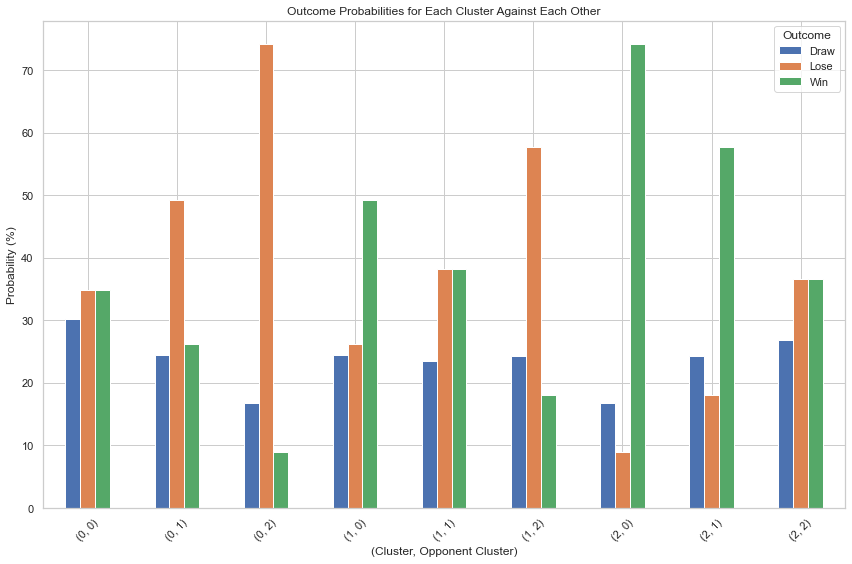

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a pivot table to facilitate the plotting
pivot_data = data.pivot_table(index=['BKMeans_Labels', 'Opponent_Cluster'], values=['Draw', 'Lose', 'Win'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=False, ax=ax)
ax.set_title('Outcome Probabilities for Each Cluster Against Each Other')
ax.set_xlabel('(Cluster, Opponent Cluster)')
ax.set_ylabel('Probability (%)')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.tight_layout()

# Show the plot
plt.show()

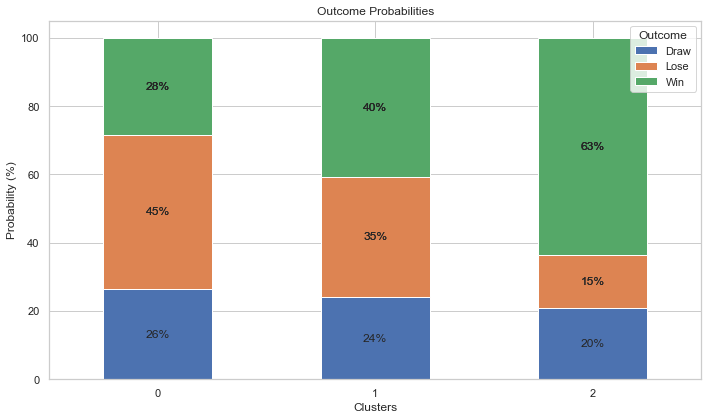

In [13]:
# Plotting with annotations
fig, ax = plt.subplots(figsize=(10, 6))
new_data.set_index('BKMeans_Labels')[['Draw', 'Lose', 'Win']].plot(kind='bar', stacked=True, ax=ax)

# Adding annotations
for n, x in enumerate([p.get_x() + p.get_width() / 2 for p in ax.patches]):
    # Calculate the height of each stack
    height = sum([p.get_height() for p in ax.patches[n::3]])
    for i, p in enumerate(ax.patches[n::3]):
        # Calculate the Y position for annotation
        y = p.get_y() + p.get_height() / 2
        value = int(p.get_height())
        if value != 0:  # Only annotate non-zero values
            ax.text(x, y, f'{value}%', ha='center', va='center')

ax.set_title('Outcome Probabilities')
ax.set_xlabel('Clusters')
ax.set_ylabel('Probability (%)')
plt.xticks(rotation=0)
plt.legend(title='Outcome')
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# Using factorplot to handle categorical data on both axes appropriately
g = sns.catplot(x='Task', y='Cluster', hue='Type', data=results_melted, kind='point', dodge=True, markers=['o', 's'], linestyles=["", ""], height=6, aspect=2)
g.ax.set_title('Best and Alternative Clusters for Each Task (Categorical Representation)')
g.set_xlabels('Tasks')
g.set_ylabels('Recommended Cluster')
plt.xticks(rotation=45)
plt.legend(title='Cluster Type')

# Show the plot
plt.show()


NameError: name 'results_melted' is not defined

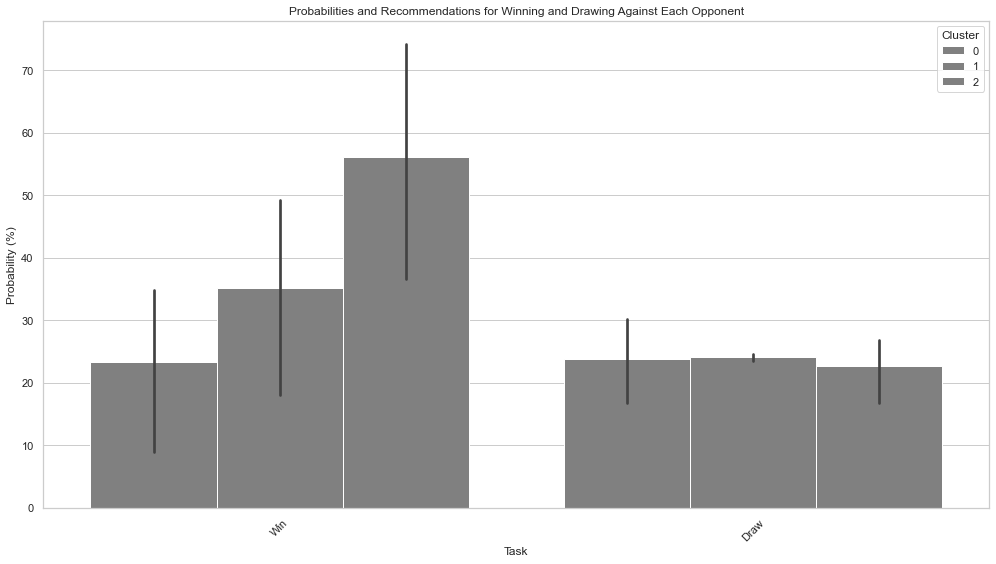

In [18]:
# Filter and reorganize the data for the specified tasks and highlight the best clusters

# Define the best clusters from the previous analysis
best_clusters = {
    'win against 0': 2,
    'draw against 0': 0,
    'win against 1': 2,
    'draw against 1': 0,
    'win against 2': 2,
    'draw against 2': 2
}

# Define colors to highlight the best and alternative clusters
colors = {0: 'lightblue', 1: 'lightgreen', 2: 'salmon'}

final_outcome_data = data

# Extract relevant probabilities
tasks_df = final_outcome_data[(final_outcome_data['Opponent_Cluster'].isin([0, 1, 2])) &
                              (final_outcome_data['Win'] > 0) | (final_outcome_data['Draw'] > 0)]

# Create a new column for color based on best cluster
tasks_df['Color'] = tasks_df.apply(lambda row: 'red' if row['BKMeans_Labels'] == best_clusters.get(f"win against {row['Opponent_Cluster']}", None)
                                   else ('blue' if row['BKMeans_Labels'] == best_clusters.get(f"draw against {row['Opponent_Cluster']}", None)
                                         else 'gray'), axis=1)

# Melt the DataFrame for plotting
tasks_melted = tasks_df.melt(id_vars=['BKMeans_Labels', 'Opponent_Cluster', 'Color'], value_vars=['Win', 'Draw'], var_name='Outcome', value_name='Probability')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x='Outcome', y='Probability', hue='BKMeans_Labels', data=tasks_melted,
            palette=tasks_df['Color'].tolist(), dodge=True)
ax.set_title('Probabilities and Recommendations for Winning and Drawing Against Each Opponent')
ax.set_xlabel('Task')
ax.set_ylabel('Probability (%)')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()

# Show the plot
plt.show()


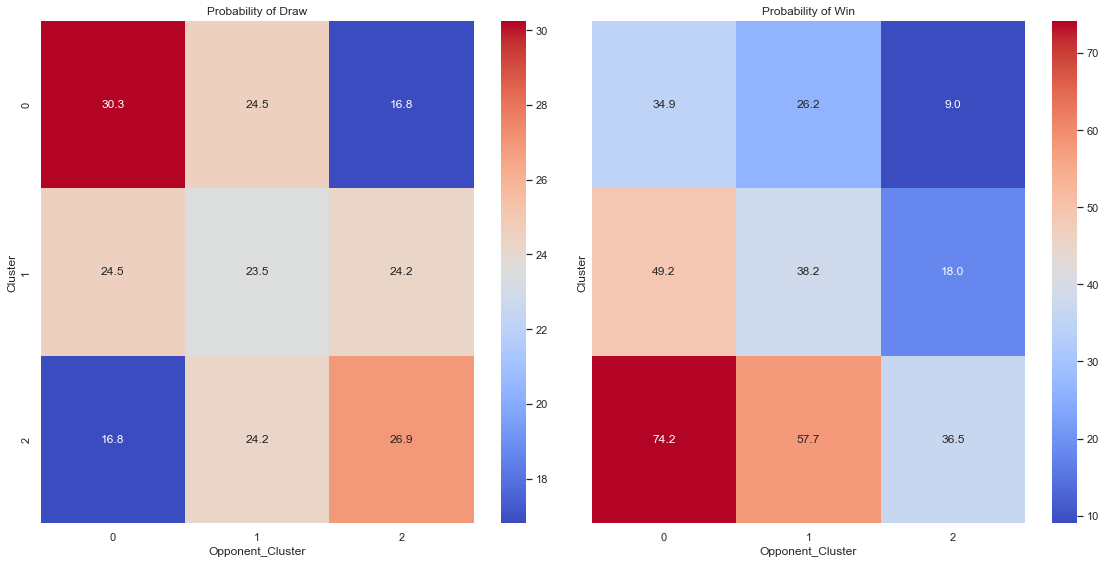

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the data for heatmap
pivot_draw = data.pivot("BKMeans_Labels", "Opponent_Cluster", "Draw")
pivot_lose = data.pivot("BKMeans_Labels", "Opponent_Cluster", "Lose")
pivot_win = data.pivot("BKMeans_Labels", "Opponent_Cluster", "Win")

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

# Draw heatmaps
sns.heatmap(pivot_draw, cmap="coolwarm", annot=True, fmt=".1f", ax=axes[0])
axes[0].set_title('Probability of Draw')
axes[0].set_ylabel("Cluster")



sns.heatmap(pivot_win, cmap="coolwarm", annot=True, fmt=".1f", ax=axes[1])
axes[1].set_title('Probability of Win')
axes[1].set_ylabel("Cluster")

# Adjust layout
plt.tight_layout()
plt.show()
